In [42]:
import sqlite3
import pandas as pd

In [43]:
# DBファイルを保存するためのファイルパス
path = '/Users/macuser/Desktop/dsp2_work/' # ローカル（自分のMac）

# DBファイル名
db_name = 'db.sqlite'

# DBに接続する（指定したDBファイル存在しない場合は，新規に作成される）
con = sqlite3.connect(path + db_name)

# SQLクエリ
sql_query = "SELECT * FROM local_data JOIN weather_data ON local_data.month = weather_data.month;"

# データを取得してDataFrameに格納
df = pd.read_sql(sql_query, con)

# DBへの接続を閉じる
con.close()

In [44]:
df

,month,number_of_steps,water_price,gas_price,sleeping_time,month,pressure,precipitation,temperature,humidity,wind_speed,daylight_hours
0,1,3715,4243,7957,380,1,1013.4,8.0,5.7,55,2.4,10.0
1,2,2463,4141,6089,392,2,1016.6,27.5,7.3,54,2.8,12.6
2,3,9700,3016,4149,304,3,1016.2,32.0,12.9,68,2.7,13.4
3,4,6501,2085,2335,322,4,1011.5,33.0,16.3,62,3.5,17.6
4,5,5639,2563,6367,349,5,1011.0,43.5,19.0,72,3.1,18.6
5,6,8537,3119,6164,365,6,1006.1,168.5,23.2,80,2.6,16.3
6,7,5539,1837,6947,343,7,1007.2,13.5,28.7,72,3.0,21.6
7,8,8734,2274,4376,324,8,1007.0,48.5,29.2,78,3.3,19.0
8,9,11962,2200,2556,345,9,1009.7,107.5,26.7,80,2.8,13.9
9,10,13416,2697,2715,323,10,1011.6,43.5,18.9,67,2.4,13.5


In [45]:
# データの先頭行を表示
df.head()

,month,number_of_steps,water_price,gas_price,sleeping_time,month,pressure,precipitation,temperature,humidity,wind_speed,daylight_hours
0,1,3715,4243,7957,380,1,1013.4,8.0,5.7,55,2.4,10.0
1,2,2463,4141,6089,392,2,1016.6,27.5,7.3,54,2.8,12.6
2,3,9700,3016,4149,304,3,1016.2,32.0,12.9,68,2.7,13.4
3,4,6501,2085,2335,322,4,1011.5,33.0,16.3,62,3.5,17.6
4,5,5639,2563,6367,349,5,1011.0,43.5,19.0,72,3.1,18.6


In [46]:
# データの基本的な統計情報を表示
df.describe()


,month,number_of_steps,water_price,gas_price,sleeping_time,month,pressure,precipitation,temperature,humidity,wind_speed,daylight_hours
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000
mean,6.500000,7567.083333,2930.500000,5045.083333,347.083333,6.500000,1011.633333,47.875000,17.641667,67.750000,2.750000,14.65000
std,3.605551,3179.893836,806.145994,2015.271399,29.815976,3.605551,3.616461,45.785133,8.115805,9.076693,0.421038,3.97229
min,1.000000,2463.000000,1837.000000,2335.000000,304.000000,1.000000,1006.100000,8.000000,5.700000,54.000000,2.100000,9.50000
25%,3.750000,5614.000000,2255.500000,3265.500000,323.750000,3.750000,1009.075000,24.500000,12.025000,61.250000,2.400000,11.95000
50%,6.500000,7299.500000,2856.500000,5232.500000,344.000000,6.500000,1011.550000,33.250000,17.600000,67.500000,2.750000,13.70000
75%,9.250000,8975.500000,3331.750000,6512.000000,368.750000,9.250000,1014.275000,44.750000,24.075000,73.500000,3.025000,17.85000
max,12.000000,13416.000000,4243.000000,7957.000000,394.000000,12.000000,1016.600000,168.500000,29.200000,80.000000,3.500000,21.60000


In [47]:
# month列を二つあるうちの一つを削除
df = df.loc[:, ~df.columns.duplicated()]

In [48]:
df

,month,number_of_steps,water_price,gas_price,sleeping_time,pressure,precipitation,temperature,humidity,wind_speed,daylight_hours
0,1,3715,4243,7957,380,1013.4,8.0,5.7,55,2.4,10.0
1,2,2463,4141,6089,392,1016.6,27.5,7.3,54,2.8,12.6
2,3,9700,3016,4149,304,1016.2,32.0,12.9,68,2.7,13.4
3,4,6501,2085,2335,322,1011.5,33.0,16.3,62,3.5,17.6
4,5,5639,2563,6367,349,1011.0,43.5,19.0,72,3.1,18.6
5,6,8537,3119,6164,365,1006.1,168.5,23.2,80,2.6,16.3
6,7,5539,1837,6947,343,1007.2,13.5,28.7,72,3.0,21.6
7,8,8734,2274,4376,324,1007.0,48.5,29.2,78,3.3,19.0
8,9,11962,2200,2556,345,1009.7,107.5,26.7,80,2.8,13.9
9,10,13416,2697,2715,323,1011.6,43.5,18.9,67,2.4,13.5


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

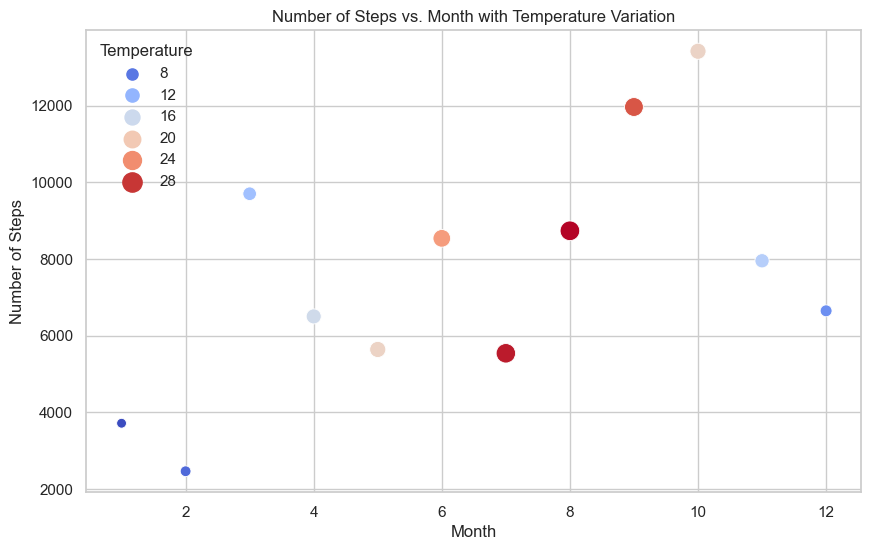

In [50]:
# グラフのスタイルを設定
sns.set(style="whitegrid")

# 散布図を作成
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='month', y='number_of_steps', data=df, hue='temperature', palette='coolwarm', size='temperature', sizes=(50, 200))

# グラフにタイトルと軸ラベルを追加
plt.title('Number of Steps vs. Month with Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Number of Steps')

# 凡例を表示
scatter_plot.legend(title='Temperature', loc='upper left')

# グラフを表示
plt.show()

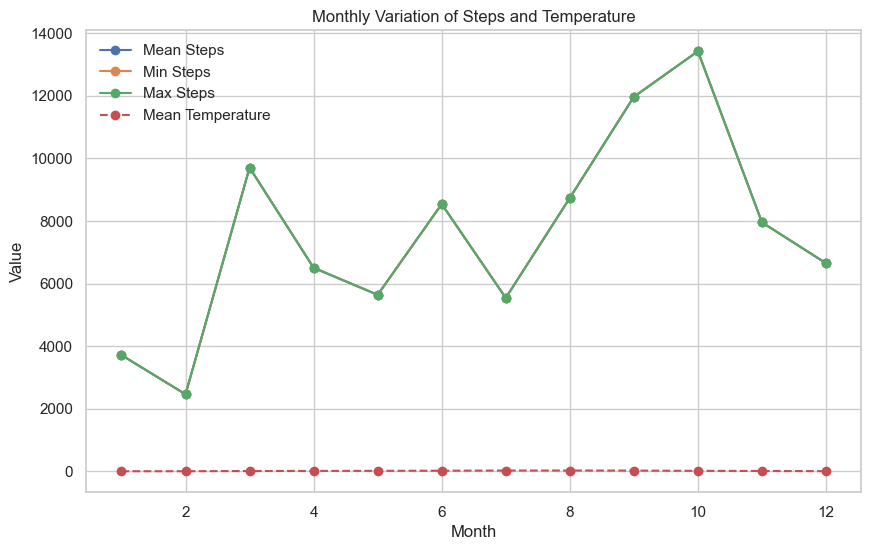

In [51]:
# 月ごとの歩数と気温の平均、最小、最大値を計算
agg_df = df.groupby('month').agg({'number_of_steps': ['mean', 'min', 'max'], 'temperature': 'mean'}).reset_index()

# グラフのスタイルを設定
sns.set(style="whitegrid")

# 折れ線グラフを作成
plt.figure(figsize=(10, 6))
plt.plot(agg_df['month'], agg_df['number_of_steps']['mean'], label='Mean Steps', marker='o')
plt.plot(agg_df['month'], agg_df['number_of_steps']['min'], label='Min Steps', marker='o')
plt.plot(agg_df['month'], agg_df['number_of_steps']['max'], label='Max Steps', marker='o')
plt.plot(agg_df['month'], agg_df['temperature']['mean'], label='Mean Temperature', linestyle='--', marker='o')

# グラフにタイトルと軸ラベルを追加
plt.title('Monthly Variation of Steps and Temperature')
plt.xlabel('Month')
plt.ylabel('Value')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

/var/folders/qb/6qn0k1qj74s4xvnpdzcwpbc40000gn/T/ipykernel_62381/208941837.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


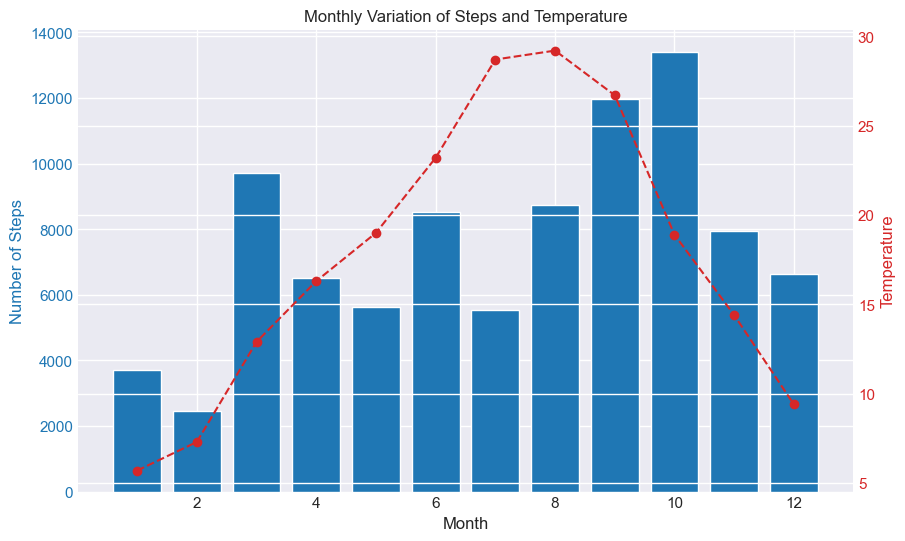

In [52]:
# グラフのスタイルを設定
plt.style.use('seaborn-darkgrid')

# 月ごとの歩数と気温を棒グラフで表示
fig, ax1 = plt.subplots(figsize=(10, 6))

# 歩数の棒グラフ
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Steps', color=color)
ax1.bar(df['month'], df['number_of_steps'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 右のy軸を作成して気温をプロット
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(df['month'], df['temperature'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# グラフにタイトルを追加
plt.title('Monthly Variation of Steps and Temperature')

# グラフを表示
plt.show()

/var/folders/qb/6qn0k1qj74s4xvnpdzcwpbc40000gn/T/ipykernel_62381/3331743790.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


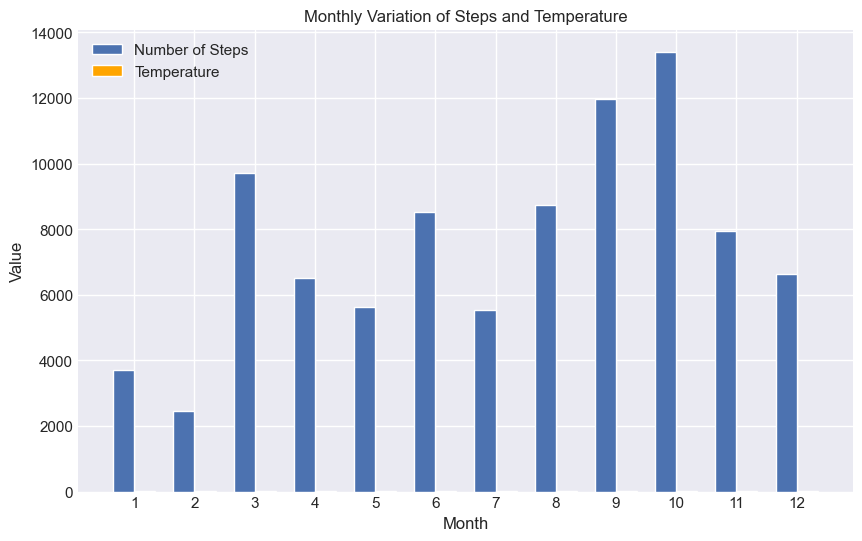

In [53]:
# グラフのスタイルを設定
plt.style.use('seaborn-darkgrid')

# 月ごとの歩数と気温をグループ化された棒グラフで表示
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# 月ごとの歩数
bar1 = ax.bar(df['month'], df['number_of_steps'], width=bar_width, label='Number of Steps')

# 月ごとの気温
bar2 = ax.bar(df['month'] + bar_width, df['temperature'], width=bar_width, label='Temperature', color='orange')

# グラフにタイトルと軸ラベルを追加
ax.set_title('Monthly Variation of Steps and Temperature')
ax.set_xlabel('Month')
ax.set_ylabel('Value')

# 凡例を表示
ax.legend()

# x軸の目盛りを設定
ax.set_xticks(df['month'] + bar_width / 2)
ax.set_xticklabels(df['month'])

# グラフを表示
plt.show()

/var/folders/qb/6qn0k1qj74s4xvnpdzcwpbc40000gn/T/ipykernel_62381/2758340507.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


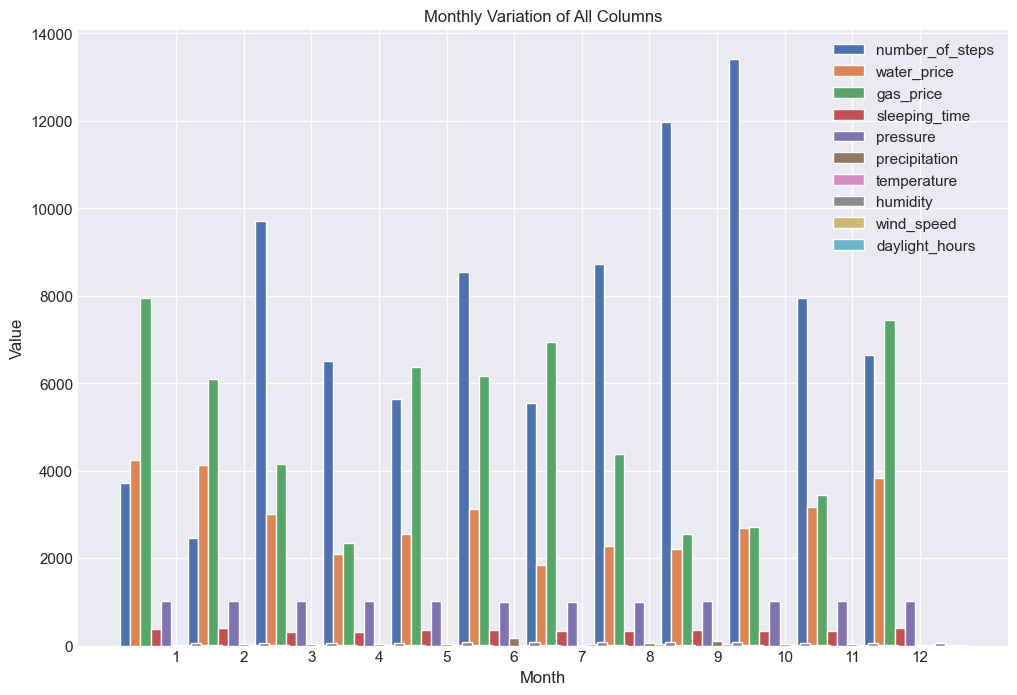

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# グラフのスタイルを設定
plt.style.use('seaborn-darkgrid')

# 月ごとの各列の値を横に並べて表示
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.15

for i, column in enumerate(df.columns[1:]):  # 最初の列（月）以外を取得
    bars = ax.bar(df['month'] + i * bar_width, df[column], width=bar_width, label=column)

# グラフにタイトルと軸ラベルを追加
ax.set_title('Monthly Variation of All Columns')
ax.set_xlabel('Month')
ax.set_ylabel('Value')

# 凡例を表示
ax.legend()

# x軸の目盛りを設定
ax.set_xticks(df['month'] + (len(df.columns[1:]) / 2) * bar_width)
ax.set_xticklabels(df['month'])

# グラフを表示
plt.show()


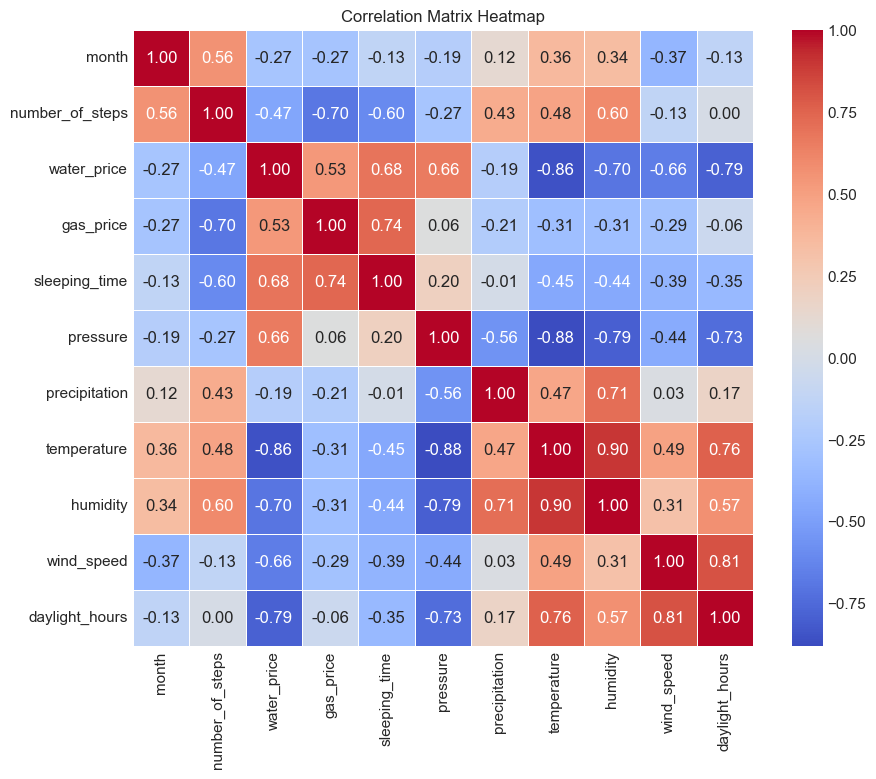

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


/var/folders/qb/6qn0k1qj74s4xvnpdzcwpbc40000gn/T/ipykernel_62381/886690992.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('month', axis=1).hist(ax=axes[0, 0])


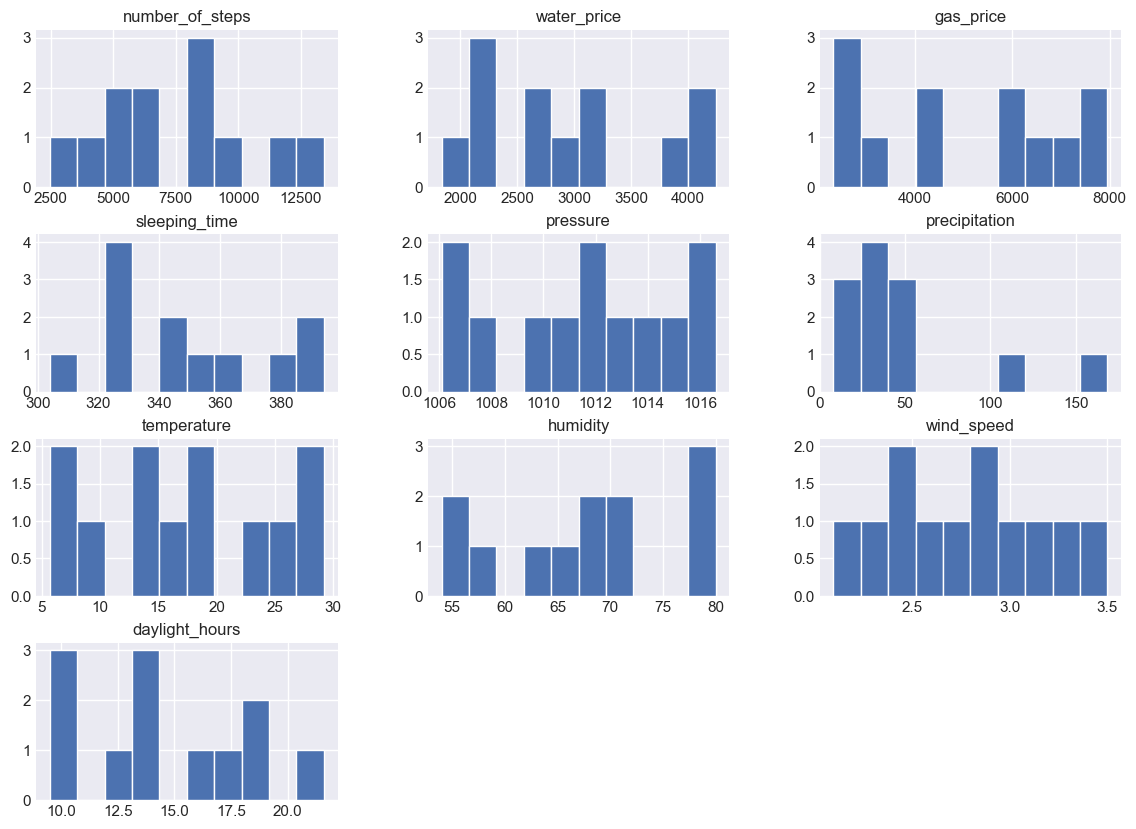

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# ヒストグラム
df.drop('month', axis=1).hist(ax=axes[0, 0])
axes[0, 0].set_title('Histograms')

# 箱ひげ図
sns.boxplot(data=df.drop('month', axis=1), ax=axes[0, 1])
axes[0, 1].set_title('Box Plots')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


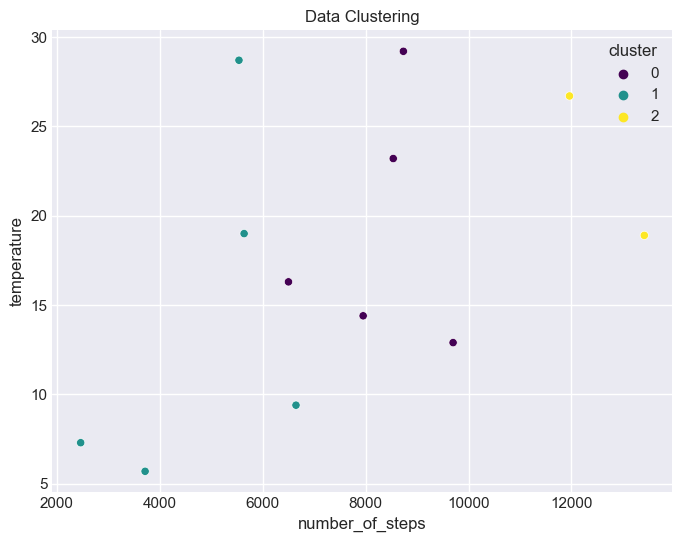

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop('month', axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='number_of_steps', y='temperature', hue='cluster', data=df, palette='viridis')
plt.title('Data Clustering')
plt.show()


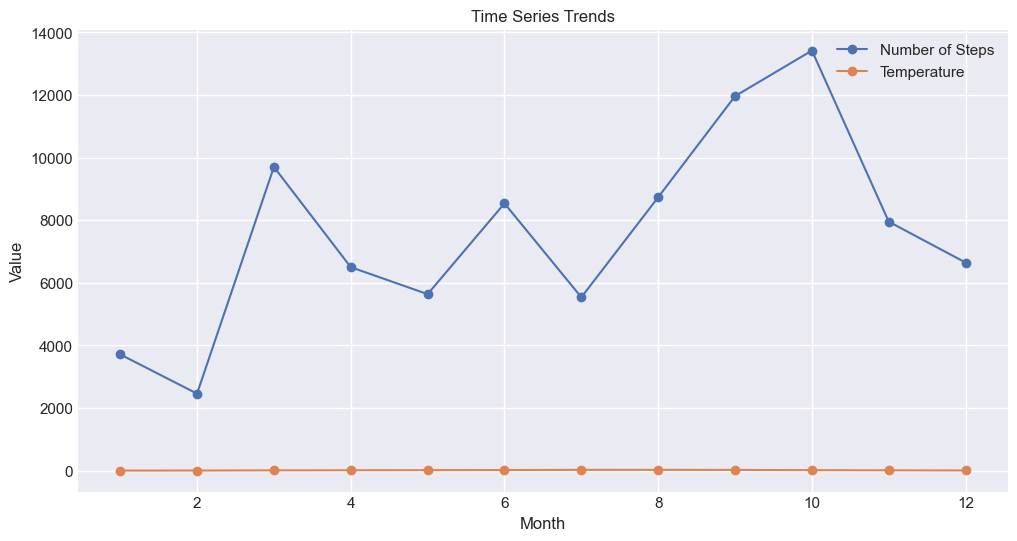

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['number_of_steps'], label='Number of Steps', marker='o')
plt.plot(df['month'], df['temperature'], label='Temperature', marker='o')
plt.title('Time Series Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()


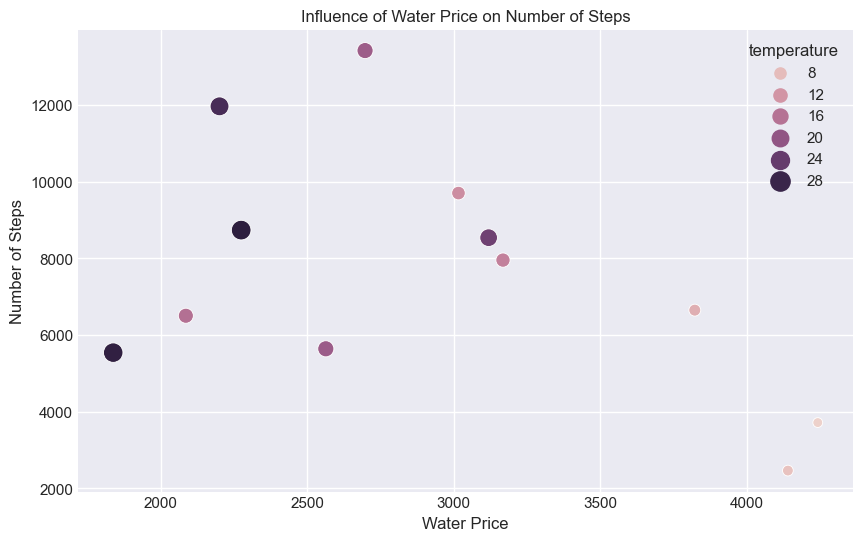

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='water_price', y='number_of_steps', data=df, hue='temperature', size='temperature', sizes=(50, 200))
plt.title('Influence of Water Price on Number of Steps')
plt.xlabel('Water Price')
plt.ylabel('Number of Steps')
plt.show()
